In [1]:
library(logiBin)

In [2]:
huna_init <- read.csv('/Users/morris/Box/Hall_Lab/Projects/HUNA/MTBLS430/MTBLS430_init.csv',
                      header=TRUE, check.names=FALSE)

nrow <- nrow(huna_init)
print(nrow)
print('assigned variables:')
for (i in 1:nrow){
    assign(toString(huna_init$type[i]), toString(huna_init$path[i]))
    print(toString(huna_init$type[i]))
}

[1] 31
[1] "assigned variables:"
[1] "setwd_path"
[1] "data_set_root_dir"
[1] "path_to_fid"
[1] "norm_bin_500_path"
[1] "norm_bin_5000_path"
[1] "bin500_for_sig_tests"
[1] "figure_path"
[1] "sample_labels_header"
[1] "stat_results_data_path_Factor_Value_Treatment_vs_E_NP_DTS_nanoparticle"
[1] "BonSig_Cohen_results_data_path_Factor_Value_Treatment_vs_E_NP_DTS_nanoparticle"
[1] "stat_results_data_path_Factor_Value_Treatment_vs_E_NP_D_nanoparticle"
[1] "BonSig_Cohen_results_data_path_Factor_Value_Treatment_vs_E_NP_D_nanoparticle"
[1] "stat_results_data_path_Factor_Value_Treatment_vs_methoxypoly__ethylene_glycol___poly__lactide_co_glycolide__polylysine"
[1] "BonSig_Cohen_results_data_path_Factor_Value_Treatment_vs_methoxypoly__ethylene_glycol___poly__lactide_co_glycolide__polylysine"
[1] "stat_results_data_path_Factor_Value_Treatment_vs_E_NP_DT_nanoparticle"
[1] "BonSig_Cohen_results_data_path_Factor_Value_Treatment_vs_E_NP_DT_nanoparticle"
[1] "filtered_ROI_path_E_NP_D_nanoparticle_vs_con

In [3]:
e_np_d_metab_path <- "/Users/morris/Box/Hall_Lab/Projects/HUNA/MTBLS430/output/rDolphin_quantification_results/E_NP_D_nanoparticle_vs_control/quantification.csv"


In [4]:
e_np_d <- read.csv(e_np_d_metab_path, header=TRUE, check.names=TRUE,
                   stringsAsFactors=FALSE)
e_np_d <- e_np_d[-c(1),]

### Extract the sample number and sample label pairing

In [5]:
generate_y <- function(case_label, control_label, phenotype_col, bin500_for_sig_tests){
    nmr_w_labels <- read.csv(file=bin500_for_sig_tests, header=TRUE, check.names=FALSE)
    index_of_case <- which(nmr_w_labels[,phenotype_col] == case_label)
    index_of_control <- which(nmr_w_labels[,phenotype_col] == control_label)
    index_case_and_control <- c(index_of_case, index_of_control)
    Individual <- as.data.frame(index_case_and_control)
    y_labels <- nmr_w_labels[index_case_and_control,]
    keep <- c('X',phenotype_col)
    y_labels <- y_labels[ , (names(y_labels) %in% keep)]
    return(y_labels)
}

In [6]:
phenotype_col <- 'Factor_Value_Treatment'
case_label <- "E-NP-D nanoparticle"
control_label <- "control"
d_y_labels <- generate_y(case_label, control_label, phenotype_col, bin500_for_sig_tests)
head(d_y_labels)

,X,Factor_Value_Treatment
,<int>,<fct>
21,1301,E-NP-D nanoparticle
22,1302,E-NP-D nanoparticle
23,1303,E-NP-D nanoparticle
24,1304,E-NP-D nanoparticle
25,1305,E-NP-D nanoparticle
26,1306,E-NP-D nanoparticle


In [7]:
d_x_y <- merge(x = e_np_d, y = d_y_labels, by = "X")
d_x_y$Y <- 0
d_x_y$Y[d_x_y$Factor_Value_Treatment == "E-NP-D nanoparticle"] <- 1
d_x_y <- subset(d_x_y, select=-c(X))
save_metab_with_stringlabels <- paste(setwd_path, data_set_root_dir, '/output/', data_set_root_dir,
                                      '_metab_with_stringlabels_for_RF_', case_label, '_vs_', control_label,
                                      '.csv', sep='')
write.csv(d_x_y, file= save_metab_with_stringlabels, row.names=FALSE)

In [8]:
d_x_y <- subset(d_x_y, select=-c(Factor_Value_Treatment))
d_x_y[, c(1:ncol(d_x_y))] <- sapply(d_x_y[, c(1:ncol(d_x_y))], as.numeric)
head(d_x_y)

X17a.Ethynylestradiol_2,Aldosterone_6,Beta.Sitosterol_6,Estriol_3,Androstanedione_9,Epiandrosterone_7,X2.Hydroxyestrone_3,Deoxycholic.acid_4,Ethylmethylacetic.acid_3,Homo.L.arginine_1,⋯,Mevalonolactone_5,PC.16.0.16.0._9,FAD_6,L....Nicotine.pestanal_7,Thymidine_6,Deoxyuridine_5,Nicotinamide.ribotide_3,Ergocalciferol_19,Niacinamide_4,Y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.032022132,0.008321055,0.002100283,0.03000443,0.1751575,0.05480411,0.032022177,0.008321070,0.002100286,0.03000449,⋯,0.00000000,0.00000000,0.0000000,0.00000000,0.03125600,0.01324763,0.04450650,0.08354423,0.008651473,0
0.038678091,0.010050627,0.002536837,0.03624101,0.2115649,0.06619542,0.011452447,0.044770446,0.008456966,0.02342968,⋯,0.05256445,0.01080893,0.5583307,0.08786799,0.03704410,0.01108743,0.05785381,0.07347459,0.005674225,0
0.009927199,0.035868080,0.008074162,0.01704256,0.2685659,0.09221206,0.006569096,0.038730027,0.018692218,0.03309927,⋯,0.00000000,0.00000000,0.0000000,0.00000000,0.03684570,0.00000000,0.00000000,0.14165035,0.007125539,0
0.006856866,0.037364240,0.021489947,0.02899201,0.1886471,0.11578756,0.031603765,0.008212344,0.002072843,0.02961244,⋯,0.05553154,0.01092526,0.4122424,0.09326586,0.02847554,0.01579839,0.05465941,0.09557006,0.007439090,0
0.000000000,0.000000000,0.000000000,0.00000000,0.0000000,0.00000000,0.030807858,0.007399087,0.002225582,0.02422348,⋯,0.04948498,0.01017569,0.5256211,0.08272027,0.03441708,0.04558173,0.01121244,0.08910263,0.004836454,0
0.000000000,0.000000000,0.000000000,0.00000000,0.0000000,0.00000000,0.006134931,0.023561810,0.019598028,0.02774204,⋯,0.00000000,0.00000000,0.0000000,0.00000000,0.05389519,0.01173366,0.03942017,0.11403751,0.003374149,0


In [9]:
d_x_y_colnames <- colnames(d_x_y)
d_x_y_colnames <- d_x_y_colnames[-c(length(d_x_y_colnames))]

In [10]:
sort(d_x_y_colnames)

[1] "Adenosine_1"                               
  [2] "Adenosine_4"                               
  [3] "Aldosterone_6"                             
  [4] "Aldosterone_8"                             
  [5] "All.trans.retinoic.acid_2"                 
  [6] "Alpha.Lactose_7"                           
  [7] "Alpha.Lactose_9"                           
  [8] "Aminoadipic.acid_6"                        
  [9] "Anabasine_7"                               
 [10] "Androstanedione_9"                         
 [11] "Androstenedione_6"                         
 [12] "Beta.Sitosterol_6"                         
 [13] "Betaine_2"                                 
 [14] "Chenodeoxycholic.acid_11"                  
 [15] "Chlorogenic.acid_3"                        
 [16] "Cholesterol.sulfate_8"                     
 [17] "Corticosterone_8"                          
 [18] "Cortisone_13"                              
 [19] "Cortisone_5"                               
 [20] "D.Fructose_2"                              
 [21] "D.Glucose_7"                               
 [22] "D.Limonene_1"                              
 [23] "D.Maltose_6"                               
 [24] "D.Mannose_7"                               
 [25] "D.Threitol_2"                              
 [26] "DL.2.Aminooctanoic.acid_4"                 
 [27] "Deoxycholic.acid.glycine.conjugate_13"     
 [28] "Deoxycholic.acid.glycine.conjugate_7"      
 [29] "Deoxycholic.acid_4"                        
 [30] "Deoxycorticosterone_6"                     
 [31] "Deoxycytidine_4"                           
 [32] "Deoxyuridine_5"                            
 [33] "Diaminopimelic.acid_1"                     
 [34] "Diethanolamine_2"                          
 [35] "Dimethylglycine_2"                         
 [36] "Epiandrosterone_7"                         
 [37] "Epietiocholanolone_5"                      
 [38] "Ergocalciferol_19"                         
 [39] "Estradiol_4"                               
 [40] "Estriol_3"                                 
 [41] "Ethylmalonic.acid_2"                       
 [42] "Ethylmethylacetic.acid_3"                  
 [43] "Etiocholanolone_7"                         
 [44] "FAD_3"                                     
 [45] "FAD_6"                                     
 [46] "Flavin.Mononucleotide_3"                   
 [47] "Gabapentin_2"                              
 [48] "Galactitol_1"                              
 [49] "Galactitol_2"                              
 [50] "Glucose.6.phosphate_4"                     
 [51] "Glucose.6.phosphate_5"                     
 [52] "Glycocholic.acid_14"                       
 [53] "Guanosine_2"                               
 [54] "Homo.L.arginine_1"                         
 [55] "Homocysteine_3"                            
 [56] "Homovanillic.acid_2"                       
 [57] "Hydroxykynurenine_1"                       
 [58] "Isobutyryl.L.carnitine_8"                  
 [59] "Isoferulic.acid_1"                         
 [60] "L....Nicotine.pestanal_7"                  
 [61] "L.Alanine_1"                               
 [62] "L.Arabinose_2"                             
 [63] "L.Aspartic.acid_5"                         
 [64] "L.Aspartic.acid_6"                         
 [65] "L.Fucose_6"                                
 [66] "L.Hexanoylcarnitine_7"                     
 [67] "L.Isoleucine_4"                            
 [68] "L.Lysine_1"                                
 [69] "L.Octanoylcarnitine_8"                     
 [70] "L.Palmitoylcarnitine_6"                    
 [71] "Lathosterol_10"                            
 [72] "Lathosterol_13"                            
 [73] "Leucinic.acid_3"                           
 [74] "Levoglucosan_2"                            
 [75] "Melatonin_4"                               
 [76] "Melibiose_6"                               
 [77] "Methionine.sulfoxide_4"                    
 [78] "Mevalonolactone_5"                         
 [79] "Monomethyl.glutar

In [11]:
e_np_d_getBin <- getBins(d_x_y, "Y", d_x_y_colnames, minCr = 0.8, nCores = 3)
e_np_d_getBin

,var,iv,pVal,stat,ent,trend,monTrend,flipRatio,numBins,purNode,varType
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
29,X3.Hydroxysuberic.acid_1,3.9921,1.510003e-08,32.040390,0.4507,I,Y,0.0,3,N,numeric
86,Gabapentin_2,2.0501,1.088126e-02,6.484607,0.6803,I,N,0.5,3,N,numeric
193,Adenosine_1,1.9994,1.116984e-05,19.300137,0.6878,D,Y,0.0,2,N,numeric
76,L.Alanine_1,1.8444,3.246299e-02,4.573879,0.7283,I,N,0.5,3,N,numeric
231,Diethanolamine_2,1.6238,1.939854e-02,5.465226,0.7439,D,Y,0.0,2,N,numeric
199,Homovanillic.acid_2,1.5714,3.594671e-02,4.399631,0.7688,D,Y,0.0,2,N,numeric
226,X3.Methoxytyramine_3,1.5714,5.763623e-02,3.604130,0.7688,D,Y,0.0,2,N,numeric
160,X.S..3.Hydroxyisobutyric.acid_3,1.4617,1.433924e-07,27.676523,0.4087,D,Y,0.0,3,Y,numeric
36,Diaminopimelic.acid_1,1.4013,1.316168e-01,2.273330,0.7925,I,Y,0.0,2,N,numeric


In [12]:
e_np_d_getBin_stats <- e_np_d_getBin$varSummary
e_np_d_getBin_stats$Bonf_sig <- FALSE
e_np_d_getBin_stats$Bonf_sig[e_np_d_getBin_stats$pVal <= 0.05/(nrow(e_np_d_getBin$varSummary))] <- TRUE
cat(data_set_root_dir,"data set: number of case samples with bonferroni correction: ",
    length(which(e_np_d_getBin_stats$Bonf_sig)))

MTBLS430 data set: number of case samples with bonferroni correction:  5

In [13]:
bonf_sig_index <- which(e_np_d_getBin_stats$Bonf_sig)
e_np_d_getBin_only_bonf_sig <- e_np_d_getBin_stats[bonf_sig_index,]
e_np_d_getBin_only_bonf_sig

,var,iv,pVal,stat,ent,trend,monTrend,flipRatio,numBins,purNode,varType,Bonf_sig
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
29,X3.Hydroxysuberic.acid_1,3.9921,1.510003e-08,32.04039,0.4507,I,Y,0,3,N,numeric,TRUE
193,Adenosine_1,1.9994,1.116984e-05,19.30014,0.6878,D,Y,0,2,N,numeric,TRUE
160,X.S..3.Hydroxyisobutyric.acid_3,1.4617,1.433924e-07,27.67652,0.4087,D,Y,0,3,Y,numeric,TRUE
96,Ethylmalonic.acid_2,0.8169,7.326926e-04,11.40443,0.7287,I,Y,0,3,Y,numeric,TRUE
176,D.Fructose_2,0.0000,1.196507e-09,36.97505,0.0000,I,Y,0,2,Y,numeric,TRUE


In [17]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.4
v tibble  3.0.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



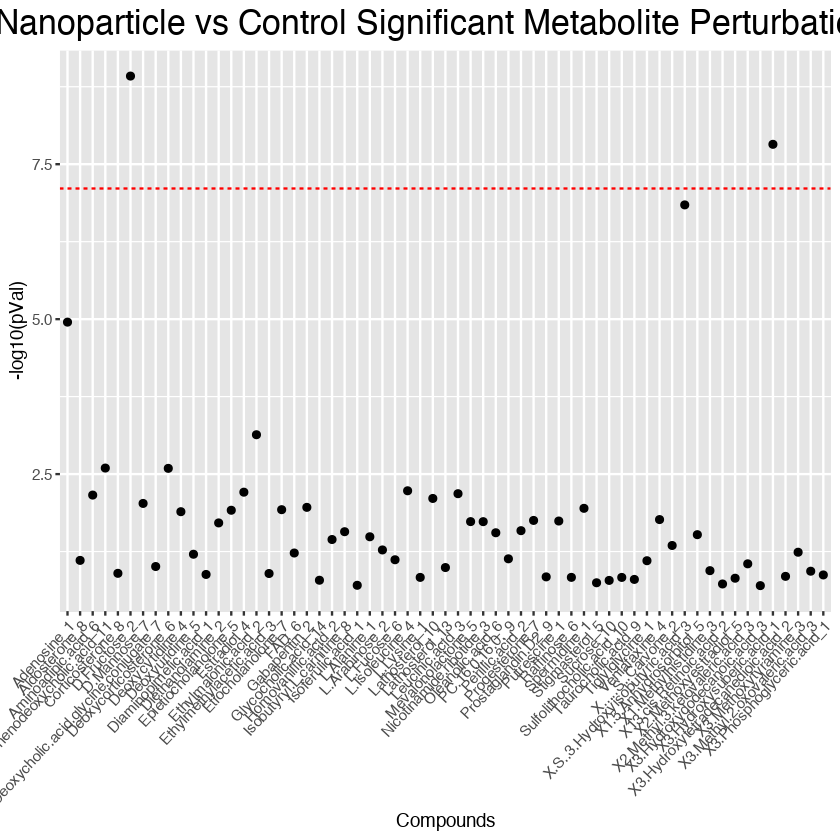

In [38]:
# make a manhattahn plot on the data
ggplot(e_np_d_getBin_stats)+
geom_point(mapping = aes(x = var, y = -log10(pVal)))+
ggtitle("E-NP-D Nanoparticle vs Control Significant Metabolite Perturbations (T-Test)")+
theme(plot.title = element_text(hjust = 0.5))+
scale_x_discrete(name ="Compounds")+
geom_hline(yintercept = (-log(0.05/nrow(e_np_d_getBin_stats))), color = "red", linetype = "dashed")+
theme(panel.background = element_rect(fill = "grey90"),plot.caption = element_text(size = 35),
      axis.text.x = element_text(angle = 47, hjust = 1), plot.title = element_text(size = 20))
ggsave(file="/Users/morris/Box/Hall_Lab/Projects/HUNA/MTBLS430/output/figures/E-NP-D_vs_control_quantmetab_manh_plot.png",
       width=15, height=5, dpi="retina")